# Advanced Visualisation

## Exploring Datasets with pandas and Matplotlib

#### Downloading and Prepping Data

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image

In [ ]:
!conda install -c anaconda xlrd --yes

/bin/bash: line 1: conda: command not found


In [ ]:
df_can = pd.read_excel('Canada.xlsx',
                                    sheet_name='Canada by Citizenship',
                                    skiprows=range(20),
                                    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
print(df_can.shape)

(195, 43)


### Membersihkan Data

In [ ]:
df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

In [ ]:
df_can.columns = list(map(str, df_can.columns))

In [ ]:
df_can.set_index('Country', inplace = True)

In [ ]:
df_can['Total'] = df_can.sum (axis=1)

<ipython-input-15-f7862e860b8d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum (axis=1)


In [ ]:
years = list(map(str, range(1980, 2014)))
print('data dimensions', df_can.shape)

data dimensions (195, 43)


In [ ]:
print(df_can.columns)


Index(['Type', 'Coverage', 'AREA', 'Continent', 'REG', 'Region', 'DEV',
       'DevName', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       'Total'],
      dtype='object')


## Data Visualizing using Matplotlib

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.7.1


In [ ]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,272,293,...,62,101,97,108,81,92,93,94,81,6634
Norway,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,116,77,...,57,53,73,66,75,46,49,53,59,5060
Sweden,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,281,308,...,205,139,193,165,167,159,134,140,140,8599


### Membuat Waffle Charts

In [ ]:
# Step 1: Menentukan proporsi setiap kategori sehubungan dengan totalnya.
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# Print
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ': ' + str(proportion))


Denmark: 0.32691075740403097
Norway: 0.24934706549056324
Sweden: 0.4237421771054058


In [ ]:
# Step 2 : Tentukan ukuran keseluruhan dari waffle chart
width = 40
height = 10

total_num_tiles = width * height
print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [ ]:
# Step 3 : Gunakan proporsi tiap kategori untuk mennetukan jumlah uin masing-masing kategori
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 131
Norway: 100
Sweden: 169


In [ ]:
# Step 4 : Membuat matriks yang menyerupai wafel dan mengisinya
waffle_chart = np.zeros((height, width))


category_index =0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle_chart[row, col] = category_index

print('Waffle chart populated!')


Waffle chart populated!


In [ ]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 640x480 with 0 Axes>

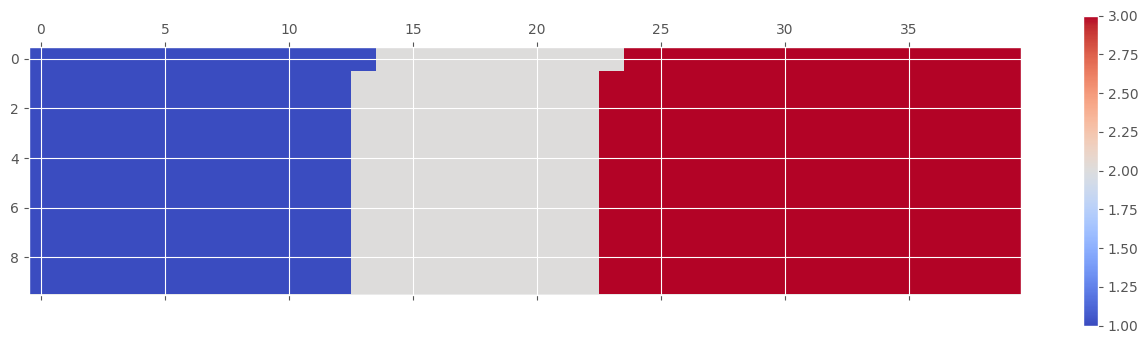

In [ ]:
# Step 5 : Petakan matriks waffle chart menjadi visual

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 640x480 with 0 Axes>

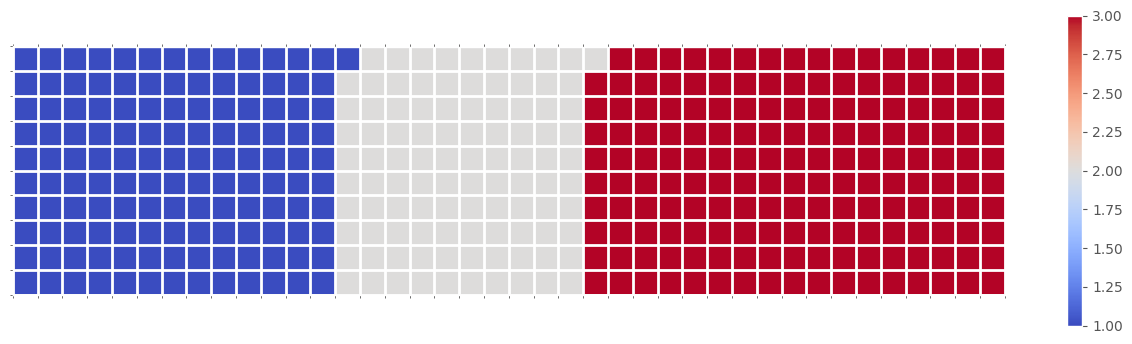

In [ ]:
# Step 6 : Percantik chart
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()


ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)


ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 640x480 with 0 Axes>

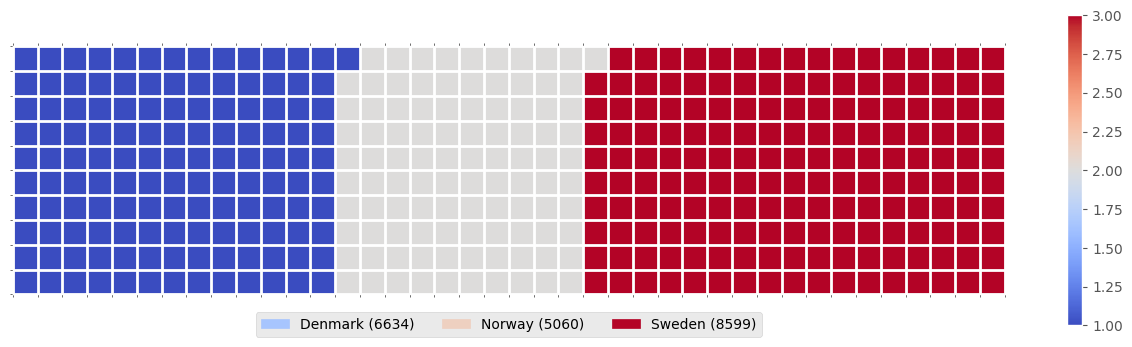

In [ ]:
# Step 7 : Tambahkan legend
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Import modul mpatches

# ...

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-0.5, width, 1), minor=True)
ax.set_yticks(np.arange(-0.5, height, 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# Perbaikan: Tambahkan 'lower center' dengan huruf kecil pada loc dan sesuaikan bbox_to_anchor
plt.legend(handles=legend_handles, loc='lower center', ncol=len(df_dsn.index.values), bbox_to_anchor=(0.5, -0.2))

plt.show()  # Untuk menampilkan plot


Total number of tiles is 50
Denmark: 20
Norway: 18
Sweden: 12


<ipython-input-28-8231946aabd9>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap(colormap)  # Ganti "plt.cm.coolwarm" dengan ini


<Figure size 640x480 with 0 Axes>

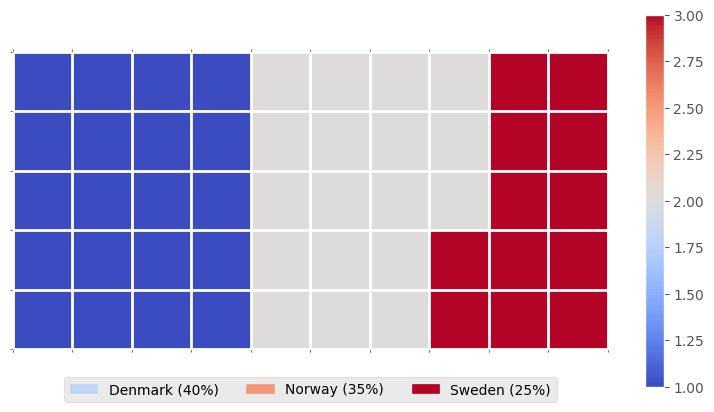

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    total_num_tiles = width * height
    print('Total number of tiles is', total_num_tiles)

    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    for i, tiles in enumerate(tiles_per_category):
        print(categories[i] + ': ' + str(tiles))

    waffle_chart = np.zeros((height, width))

    category_index = 0
    tile_index = 0

    for col in range(width):
        for row in range(height):
            tile_index += 1

            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1

            waffle_chart[row, col] = category_index

    fig = plt.figure()

    colormap = plt.cm.get_cmap(colormap)  # Ganti "plt.cm.coolwarm" dengan ini
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()

    ax.set_xticks(np.arange(-0.5, width, 1), minor=True)  # Ubah tanda "-" menjadi "0.5"
    ax.set_yticks(np.arange(-0.5, height, 1), minor=True)  # Ubah tanda "-" menjadi "0.5"

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0.5, -0.2)  # Ubah nilai bbox_to_anchor
    )

    plt.show()  # Menampilkan plot

# Contoh penggunaan:
categories = ['Denmark', 'Norway', 'Sweden']
values = [40, 35, 25]

create_waffle_chart(categories, values, height=5, width=10, colormap='coolwarm', value_sign='%')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    total_num_tiles = width * height
    print('Total number of tiles is ', total_num_tiles)

    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    for i, tiles in enumerate(tiles_per_category):
        print(categories[i] + ': ' + str(tiles))

    waffle_chart = np.zeros((height, width))

    category_index = 0
    tile_index = 0

    for col in range(width):
        for row in range(height):
            tile_index += 1

            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1

            waffle_chart[row, col] = category_index

    fig = plt.figure()

    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()

    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + value_sign + str(values[i]) + ')'

            color_val = colormap(float(values_cumsum[i]) / total_values)
            legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1))


In [ ]:
width = 40
height = 10

categories = df_dsn.index.values
values = df_dsn['Total']

colormap = plt.cm.coolwarm

Total number of tiles is  400
Denmark: 131
Norway: 100
Sweden: 169


<Figure size 640x480 with 0 Axes>

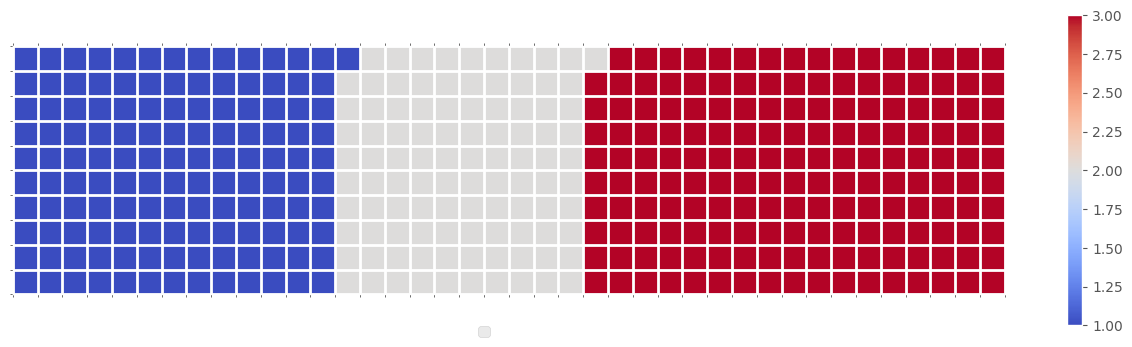

In [ ]:
create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds

In [ ]:
pip install wordcloud pillow

In [ ]:
# Install Wordcloud

!pip install wordcloud

# import package amd its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print('Wordcloud is installed and imported')

Wordcloud is installed and imported


In [ ]:
import requests

url = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt'
response = requests.get(url)

if response.status_code == 200:
    with open('alice_novel.txt', 'wb') as file:
        file.write(response.content)
    alice_novel = open('alice_novel.txt', 'r').read()
    print('File downloaded and saved!')
else:
    print('Failed to download the file.')


File downloaded and saved!


In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
for font_path in font_list:
    print(font_path)


/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf
/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf
/usr/share/fonts/truetype/

In [ ]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

In [ ]:
alice_wc.generate(alice_novel)

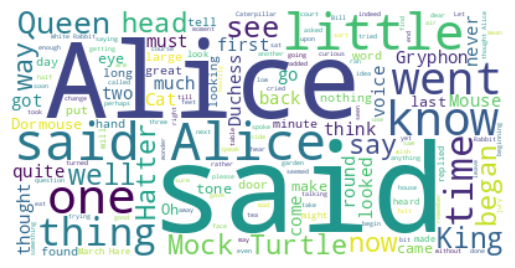

In [ ]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

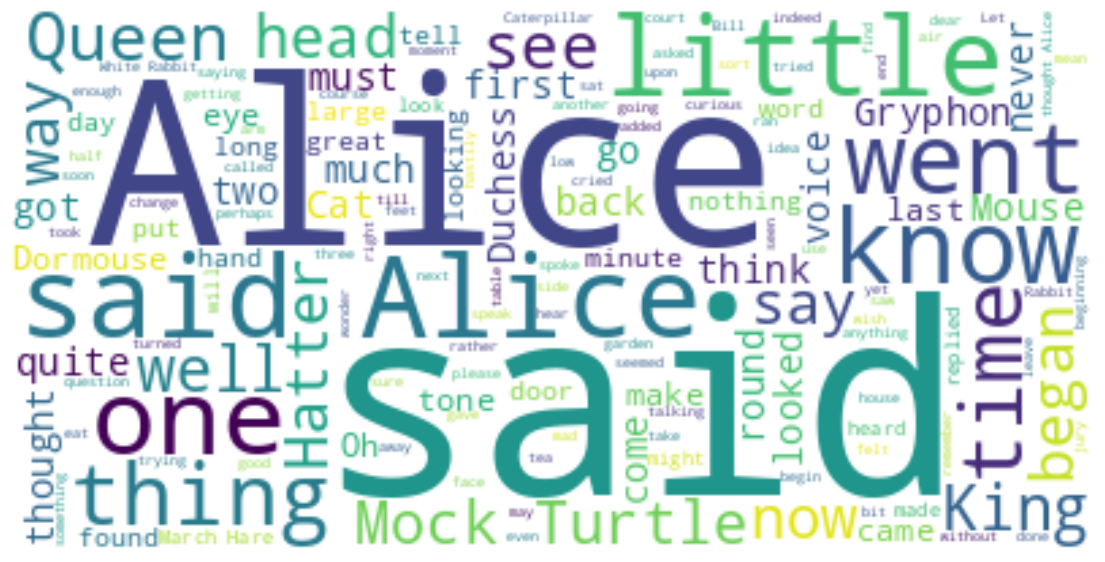

In [ ]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

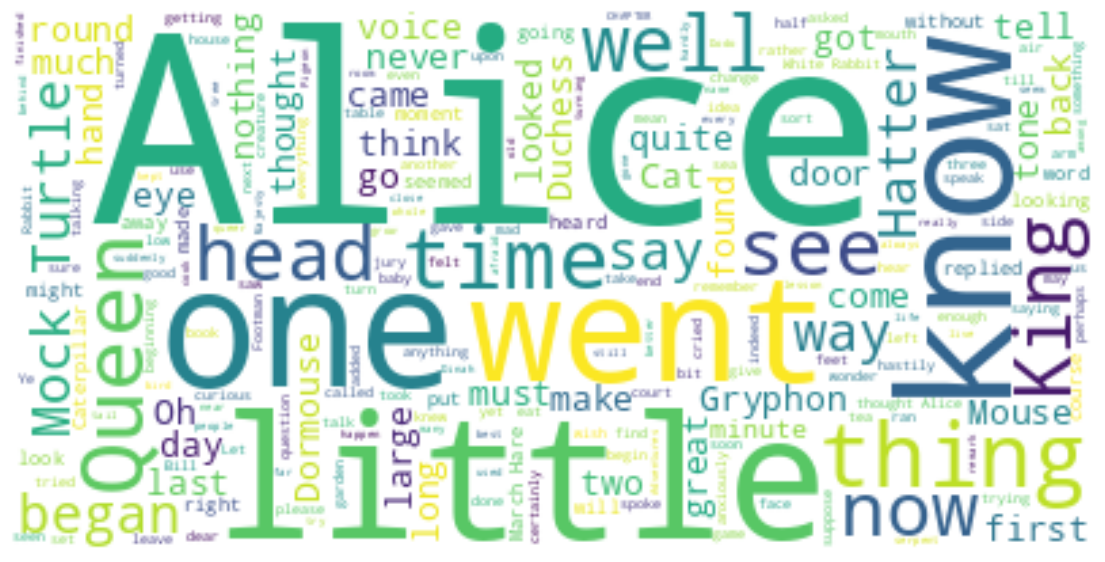

In [ ]:
stopwords.add('said')
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
alice_mask = np.array(Image.open('alice_mask.png'))
print('Image downloaded and saved!')

Image downloaded and saved!


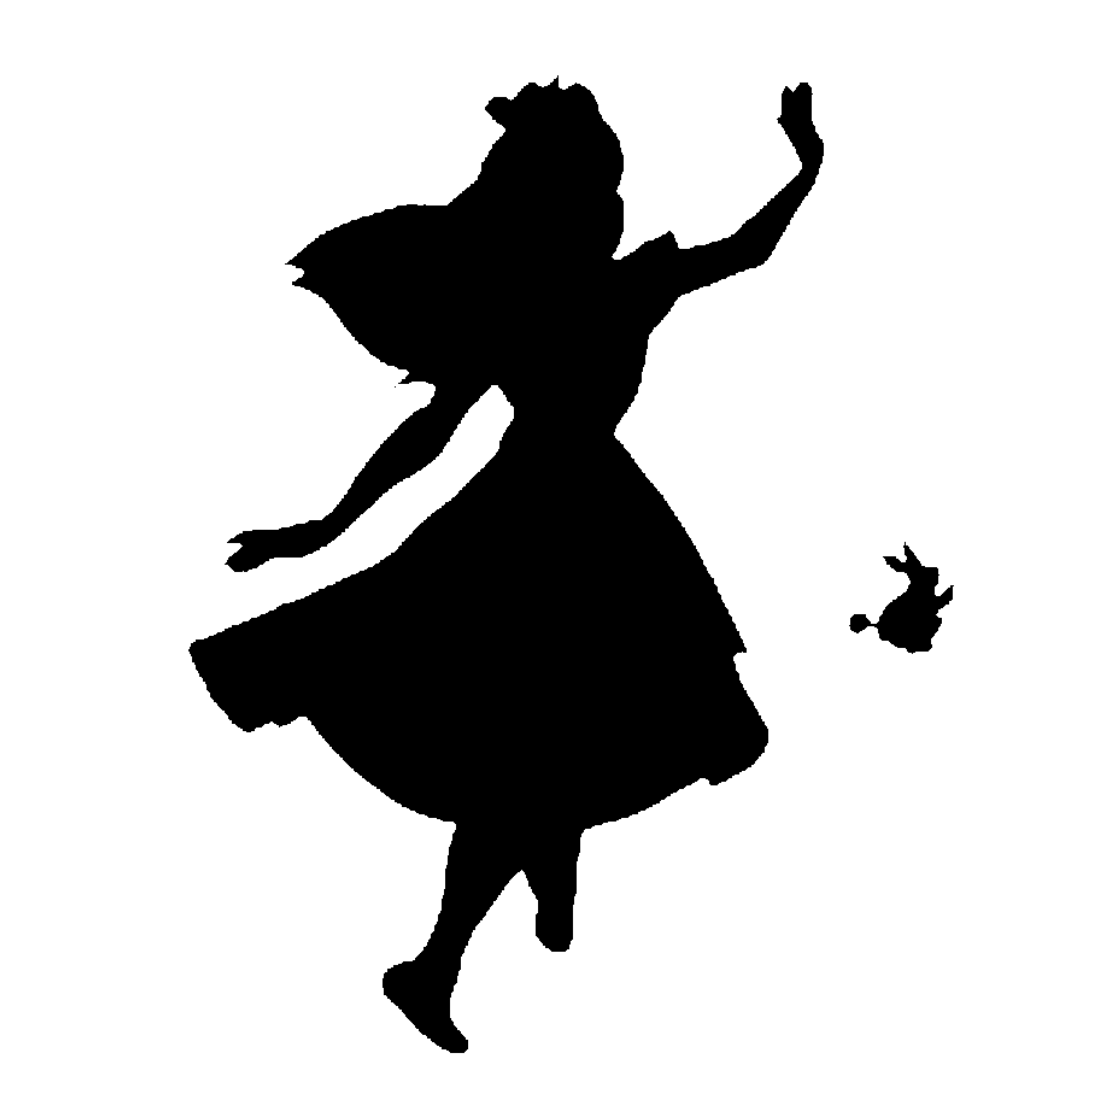

In [ ]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

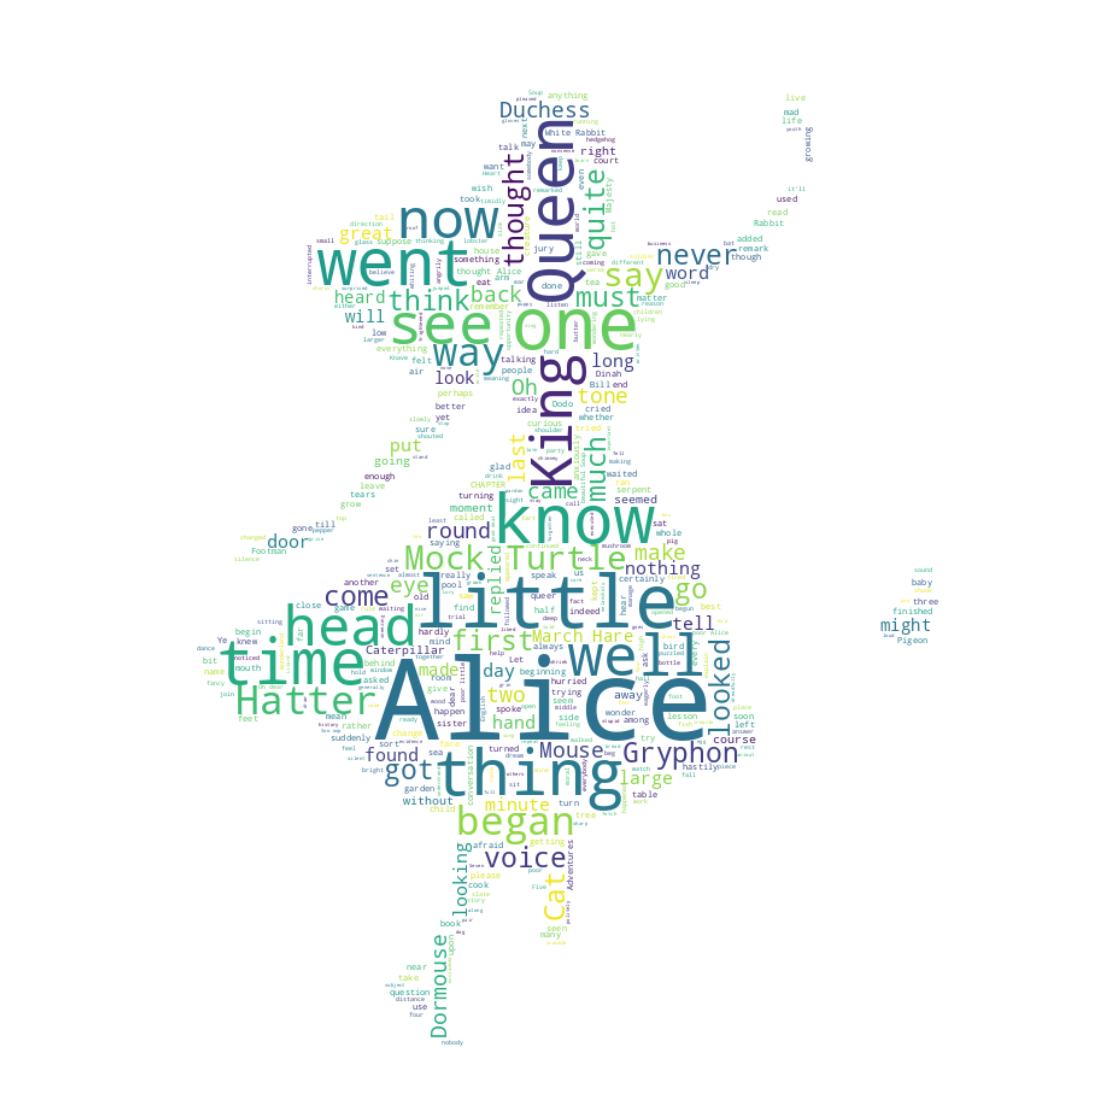

In [ ]:
alice_wc = WordCloud(background_color='white', max_words=2000,
mask=alice_mask, stopwords=stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Contoh data teks dari dataset imigirasi

In [ ]:
df_can.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,2749


In [ ]:
total_immigration = df_can['Total'].sum()
total_immigration

7006542

In [ ]:
max_words = 90
word_string = ''
for country in df_can.index.values:
  if len(country.split(' ')) == 1:
    repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
    word_string = word_string + ((country + ' ') * repeat_num_times)

word_string

'China China China China China China China China France Guyana Haiti India India India India India India India India Jamaica Lebanon Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Poland Romania '

In [ ]:
wordcloud = WordCloud(background_color='white').generate(word_string)
print('Word cloud created!')

Word cloud created!


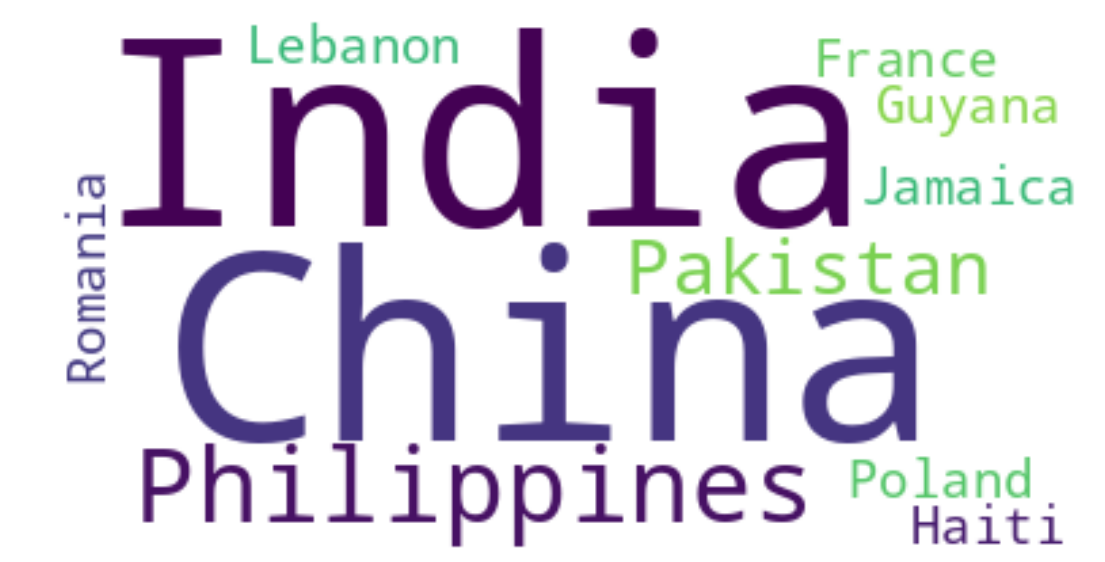

In [ ]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Regression Plots

In [ ]:
!pip install seaborn
import seaborn as sns
print('Seaborn installed and imported!')

Seaborn installed and imported!


Buat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke Kanada pertahun dari 1980 hingga 2014

In [ ]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


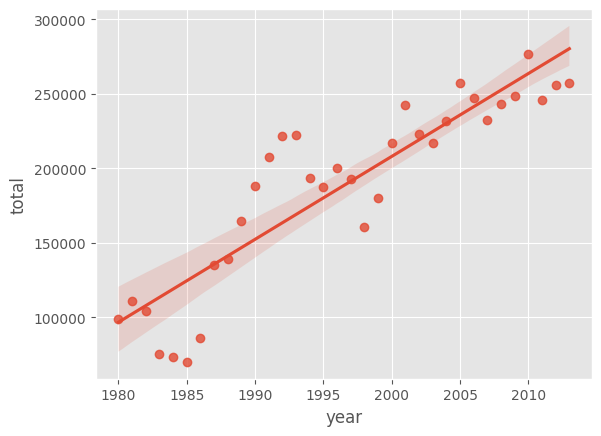

In [ ]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

Plot dan garis regresi dapat disesuaikan. Ubah warnanya jadi hijau

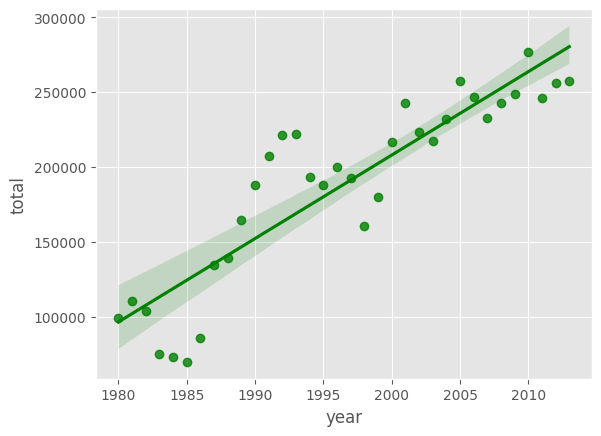

In [ ]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

Bentuk marker dapat disesuailan, sebagai ganti circular markers gantilah dengan '+'

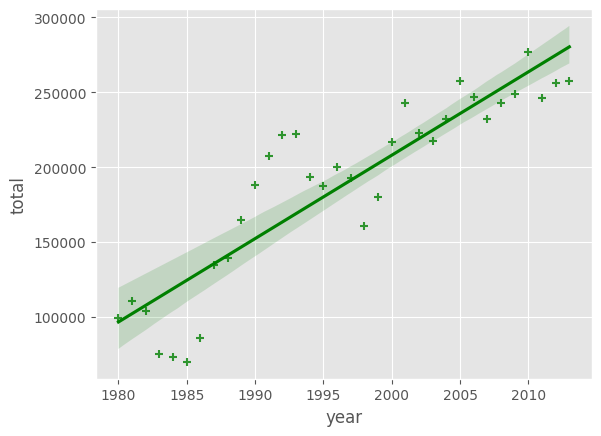

In [ ]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Perbesar plotnya agar lebih menarik

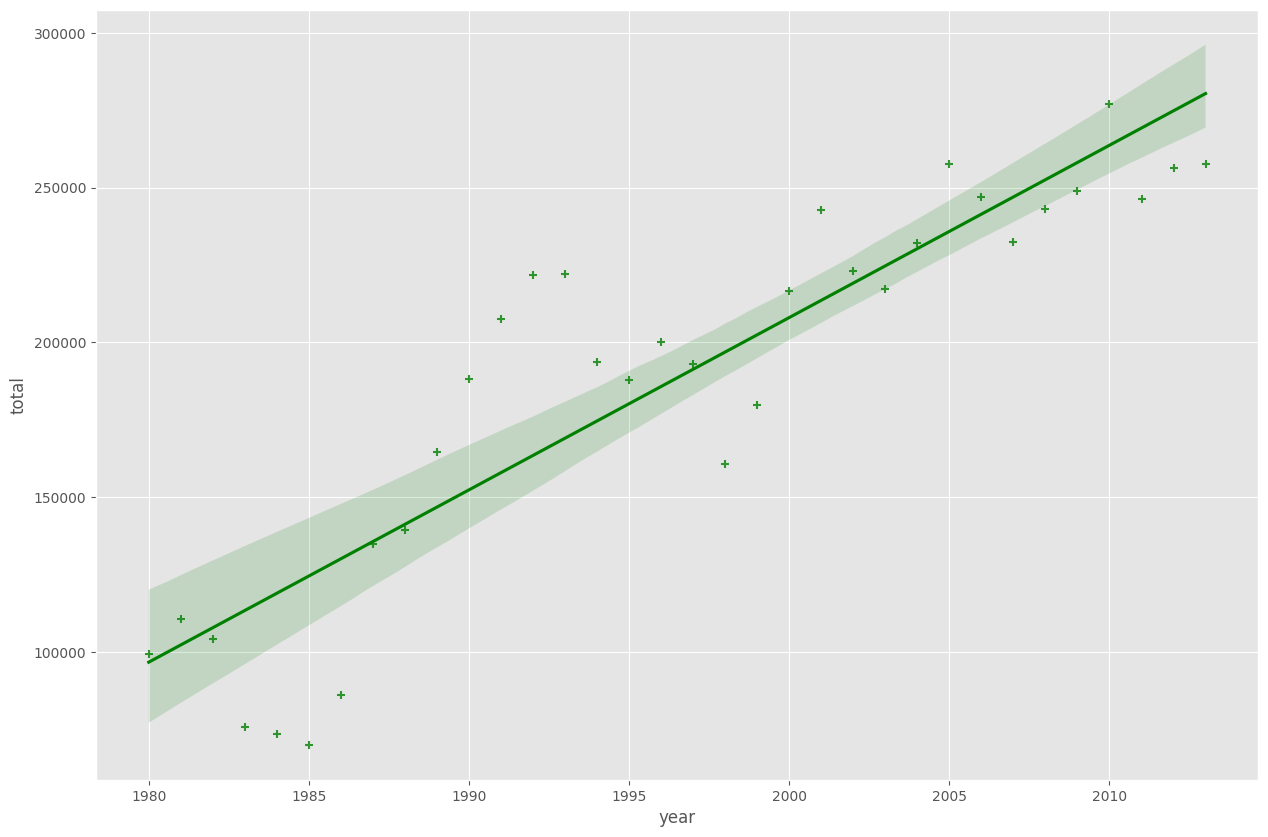

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Menambahkan judul dan label pada sumbu x dan y

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

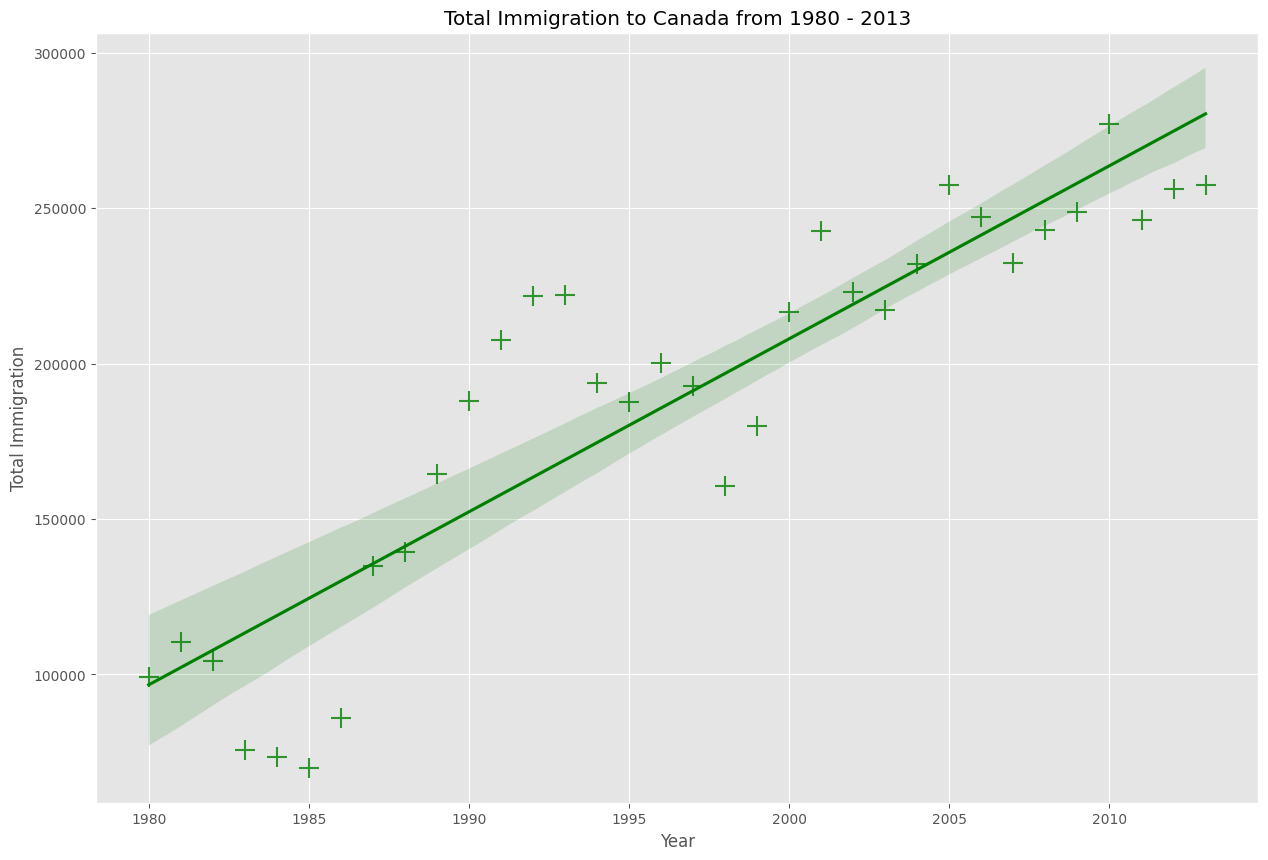

In [ ]:
plt.figure(figsize=(15, 10))

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Meningkatkan ukuran font pada label tand acentang, judul, label x dan y aar terlihat lenih berbeda

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

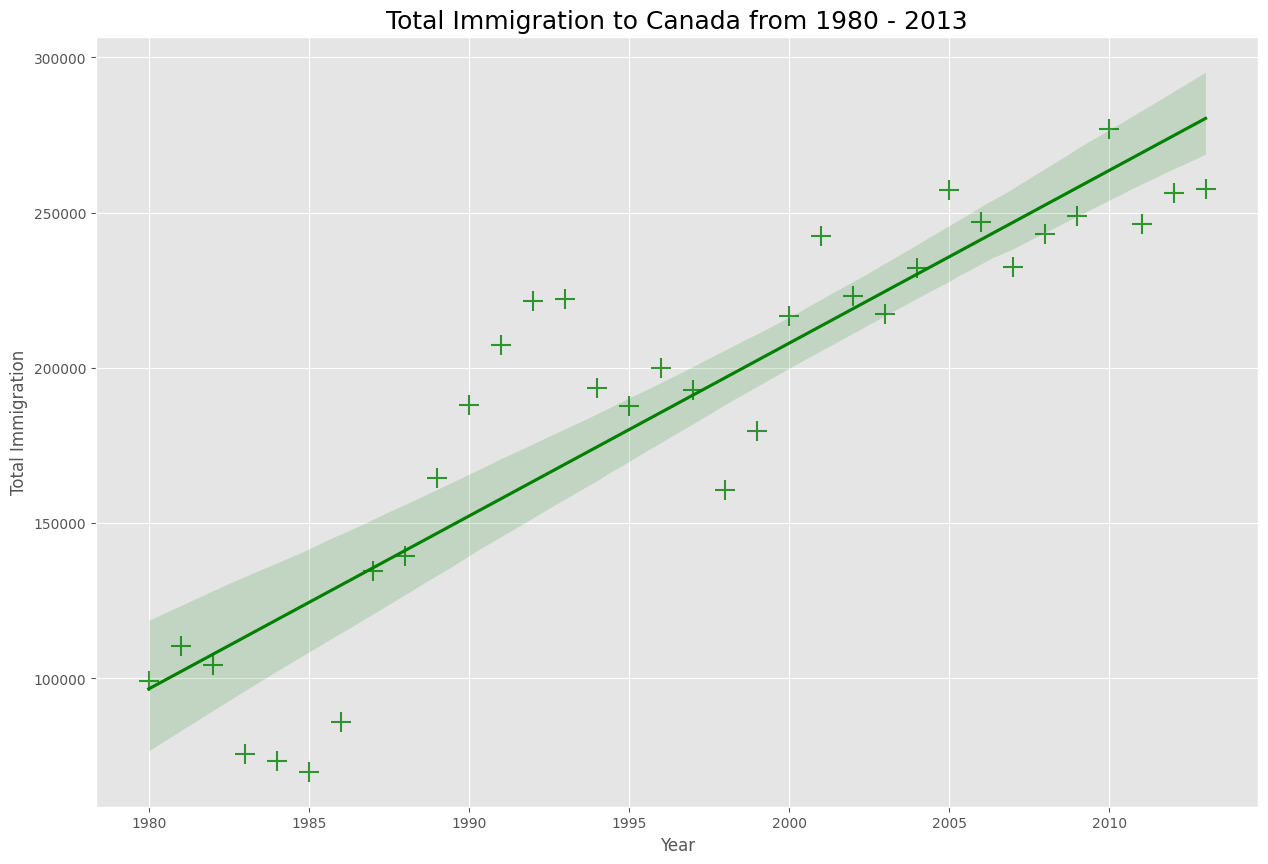

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

sns.set(font_scale=1.5)

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

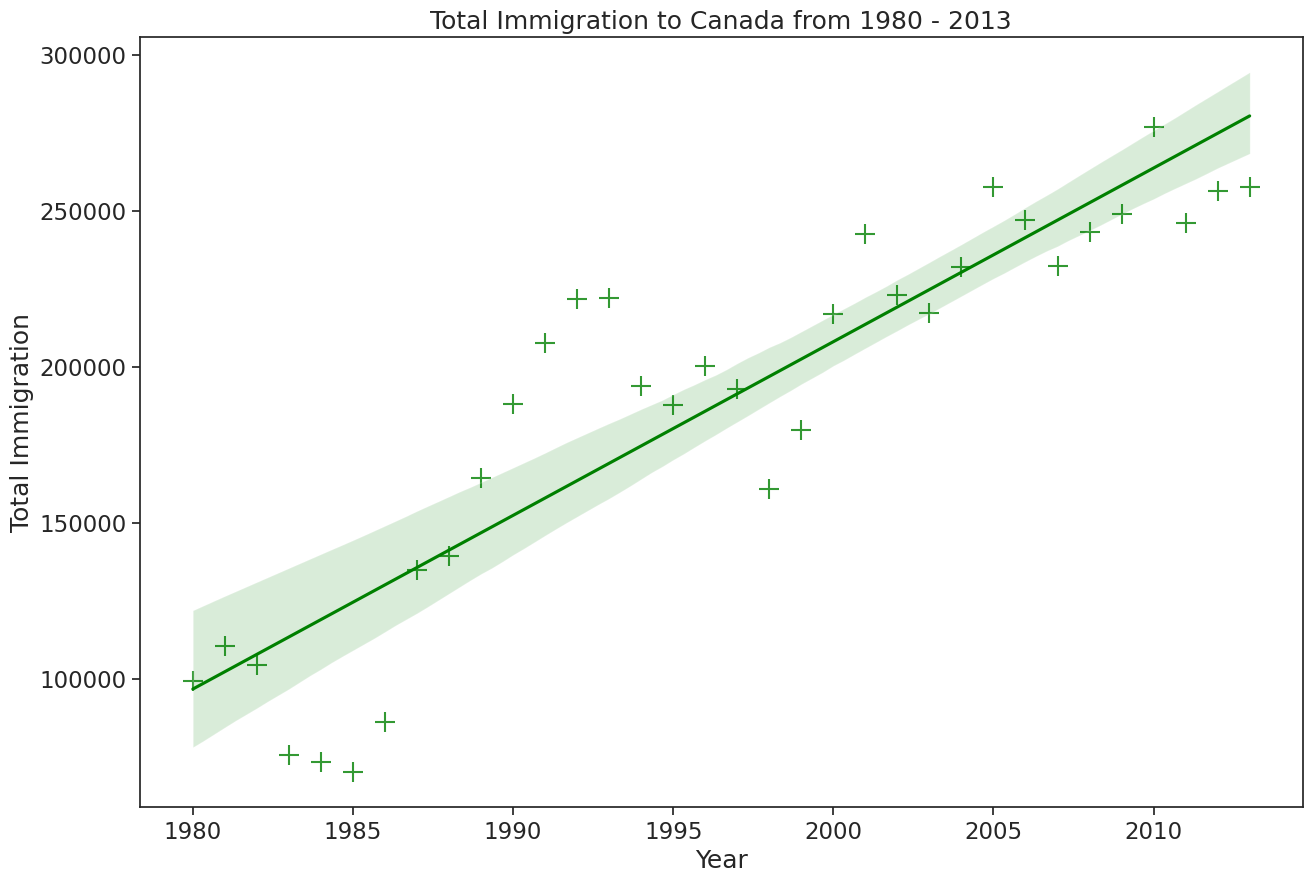

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

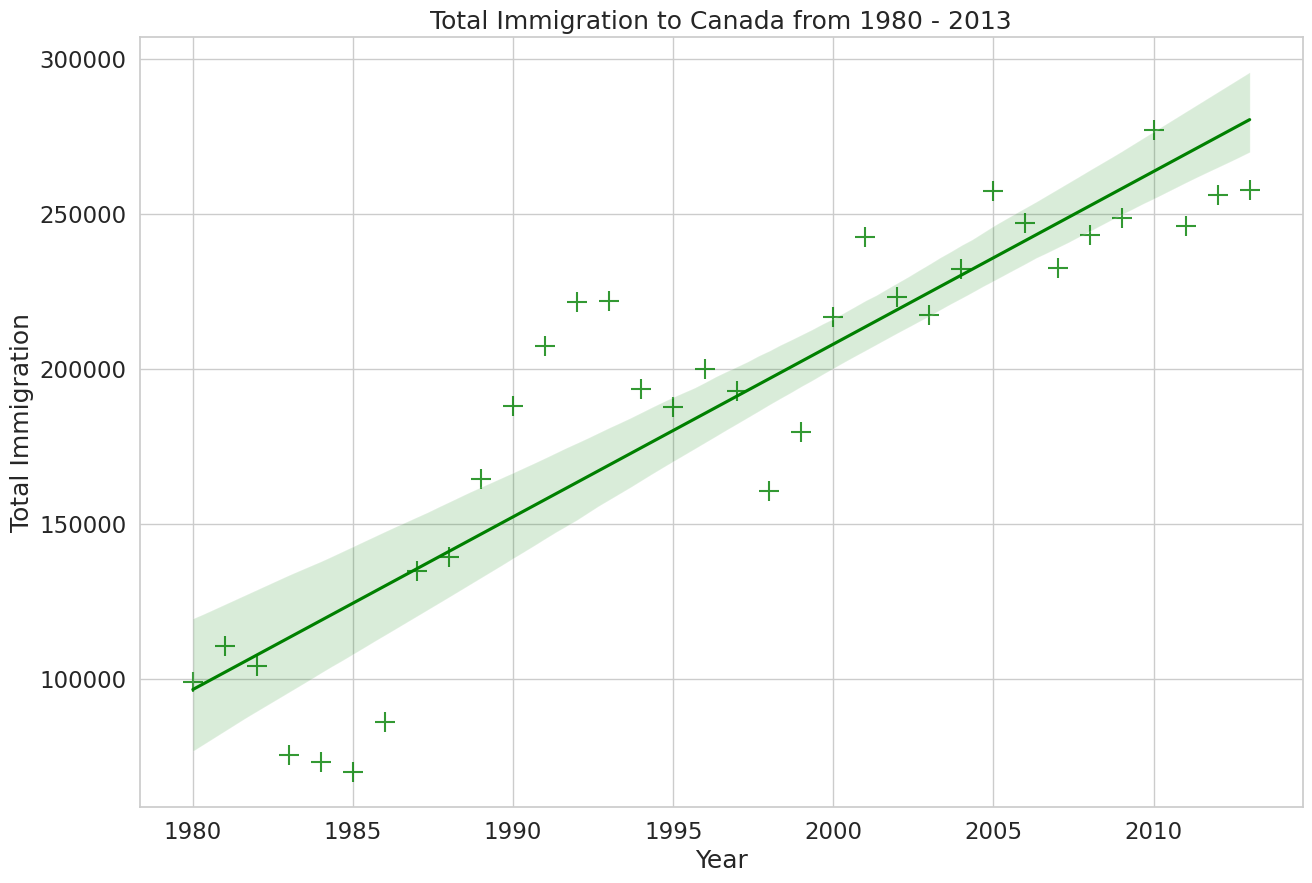

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Buat scatter plot dengan menggunakan seaborm untuk memvisualisasikan imigran dari Denmark, Swedia, dan Norwegian ke Canada pada tahun 1980 hingga 2013

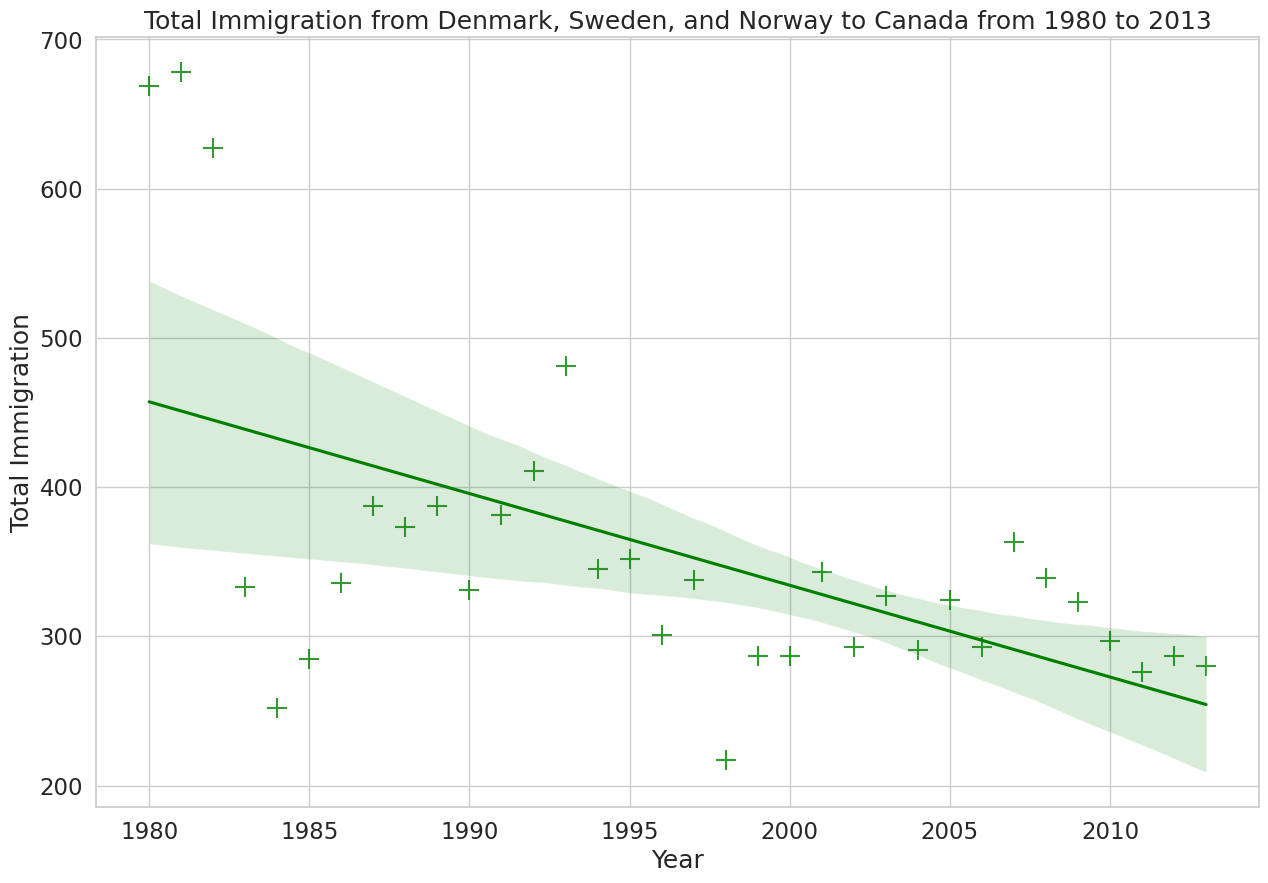

In [ ]:

# DataFrame yang berisi data untuk Denmark, Norway, dan Sweden
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# Menghitung total imigrasi tahunan
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)

# Memperbaiki penamaan kolom
df_total.columns = ['year', 'total']

# Mengonversi kolom 'year' menjadi tipe data integer
df_total['year'] = df_total['year'].astype(int)

# Mengatur ukuran plot
plt.figure(figsize=(15, 10))

# Mengatur gaya plot
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# Membuat regplot
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013')

# Menampilkan plot
plt.show()
